In [1]:
import numpy as np
import pandas as pd
import statistics
from os import listdir
import skfda
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

import re

In [2]:
def clustering(data, participants, f): 
    
    cost = []
    silhouette = []

    for i in range(2, participants):
        fuzzy_kmeans = skfda.ml.clustering.FuzzyCMeans(n_clusters=i, fuzzifier=f, random_state=0)
        fd = skfda.FDataGrid(data)
        fuzzy_kmeans.fit(fd)
        #kmeans.fit_predict(data)
        
        # Calculate Silhoutte Score
        score = silhouette_score(data, fuzzy_kmeans.labels_, metric='euclidean')
        silhouette.append(score)
    
        # Calculates squared error for the clustered points
        cost.append(fuzzy_kmeans.inertia_)    
        
    # Plot the cost against K values
    plt.plot(range(2, participants), cost, color ='g', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot
    
    # Plot the Silhouette Score against K values
    plt.plot(range(2, participants), silhouette, color ='b', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Silhouette Score")
    plt.show() # clear the plot
    # the point of the elbow is the
    # most optimal value for choosing k
    


In [3]:
#pip install scikit-fda --user

## WESAD

In [4]:
wesad_dataset = pd.read_csv('Final_CSVs/wesad_new_with1.csv')
data_dir = 'WESAD/'

In [5]:
ids = []
age = []
gender = []
dominant_hand = []
coffee_today = []
coffee_hour = []
sports = []
smoker = []
smoke_hour = []
ill = []

for x in range(2, 18):
    #subjects 1 and 12 were not included in the published data
    if x != 12:
        f = open(data_dir + "S" + str(x) + '/S' + str(x) +"_readme.txt", "r")
        content = f.readlines()
        ids.append(x)
        age.append(int(re.findall("\d+", content[1])[0]))
        gender.append(re.findall("male|female", content[4])[0])
        dominant_hand.append(re.findall("right|left", content[5])[0])
        coffee_today.append(re.findall("YES|NO", content[8])[0])
        coffee_hour.append(re.findall("YES|NO", content[9])[0])
        sports.append(re.findall("YES|NO", content[10])[0])
        smoker.append(re.findall("YES|NO", content[11])[0])
        smoke_hour.append(re.findall("YES|NO", content[12])[0])
        ill.append(re.findall("YES|NO", content[13])[0])
        
        
        

In [6]:
wesad_extra = pd.DataFrame(
                            {'id': ids,
                             'age': age,
                             'gender': gender,
                             'dominant_hand': dominant_hand,
                             'coffee_today': coffee_today,
                             'coffee_hour': coffee_hour,
                             'sports': sports,
                             'smoker': smoker,
                             'smoke_hour': smoke_hour,
                             'ill': ill
                            })

In [7]:
wesad_extra

,id,age,gender,dominant_hand,coffee_today,coffee_hour,sports,smoker,smoke_hour,ill
0,2,27,male,right,NO,NO,NO,NO,NO,NO
1,3,27,male,right,NO,NO,NO,NO,NO,NO
2,4,25,male,right,NO,NO,NO,NO,NO,NO
3,5,35,male,right,YES,NO,NO,NO,NO,NO
4,6,27,male,right,YES,NO,NO,YES,NO,NO
5,7,28,male,right,NO,NO,YES,NO,NO,NO
6,8,27,female,left,YES,NO,YES,NO,NO,NO
7,9,26,male,right,NO,NO,NO,NO,NO,YES
8,10,28,male,right,NO,NO,NO,NO,NO,NO
9,11,26,female,right,YES,NO,NO,NO,NO,NO


In [8]:
# Drop unnecessary features

wesad_extra.drop(['smoke_hour'], axis=1, inplace=True)
wesad_extra.drop(['coffee_hour'], axis=1, inplace=True)

In [9]:
# Label Encoding categorical features

le = preprocessing.LabelEncoder()

wesad_extra['gender'] = le.fit_transform(wesad_extra['gender'])
wesad_extra['dominant_hand'] = le.fit_transform(wesad_extra['dominant_hand'])
wesad_extra['coffee_today'] = le.fit_transform(wesad_extra['coffee_today'])
wesad_extra['sports'] = le.fit_transform(wesad_extra['sports'])
wesad_extra['smoker'] = le.fit_transform(wesad_extra['smoker'])
wesad_extra['ill'] = le.fit_transform(wesad_extra['ill'])

In [10]:

scaler = MinMaxScaler()
wesad_extra[['age']] = scaler.fit_transform(wesad_extra[['age']])

In [11]:
wesad_dataset

,ACC110,ACC111,ACC1110,ACC1111,ACC1112,ACC1113,ACC1114,ACC1115,ACC1116,ACC1117,...,EDA11,EDA12,EDA13,TEMP10,TEMP11,TEMP12,TEMP13,id,dataset,stress
0,275.095822,257.706505,309.874457,335.958433,309.874457,214.233212,257.706505,344.653091,370.737067,335.958433,...,-2015.464571,-944.071437,-904.398252,5090.486004,5090.486004,4860.722884,4860.722884,11,Train,1.0
1,-627.837227,-680.813133,-866.228804,-707.301086,-548.373367,-548.373367,-521.885414,-574.861320,-601.349274,-627.837227,...,-4070.109389,-4059.534817,-4080.683961,5464.362128,5464.362128,5704.145133,5704.145133,4,Train,0.0
2,-495.397461,-495.397461,-495.397461,-521.885414,-495.397461,-495.397461,-495.397461,-495.397461,-495.397461,-495.397461,...,-4799.854061,-4810.428633,-4799.854061,11219.154268,11219.154268,11219.154268,11219.154268,4,Train,0.0
3,-312.637815,-336.365602,-348.229495,-360.093388,-300.773921,-336.365602,-348.229495,-348.229495,-383.821175,-371.957282,...,1496.828511,1513.949214,1502.533927,-5817.578991,-5817.578991,-5632.552542,-5632.552542,2,Train,1.0
4,-7.235882,-7.235882,-7.235882,-7.235882,-7.235882,-7.235882,-7.235882,-7.235882,-7.235882,-7.235882,...,-7228.750604,-7167.131140,-7167.131140,1150.312933,1049.554349,1049.554349,1049.554349,15,Train,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78761,161.917923,161.917923,161.917923,161.917923,161.917923,173.781816,161.917923,161.917923,161.917923,161.917923,...,-1082.687849,-1076.982432,-1082.687849,11204.854337,11204.854337,11204.854337,11204.854337,2,Test,0.0
78762,168.767337,168.767337,168.767337,168.767337,168.767337,168.767337,168.767337,168.767337,168.767337,168.767337,...,-3958.932937,-3969.283320,-3979.641795,6846.752098,6846.752098,6846.752098,6846.752098,16,Test,0.0
78763,-174.028735,-174.028735,-174.028735,-174.028735,-174.028735,-174.028735,-174.028735,-174.028735,-174.028735,-174.028735,...,-3702.069290,-3702.069290,-3702.069290,-410.537962,-410.537962,-410.537962,-410.537962,10,Test,0.0
78764,40.669509,48.001085,-61.972554,26.006357,-142.619890,-142.619890,55.332661,91.990541,187.301029,172.637877,...,3965.861145,3949.758752,4416.816285,-2681.315127,-2681.315127,-2681.315127,-2681.315127,8,Test,1.0


In [12]:
wesad_features = pd.DataFrame()
wesad_features['id'] = wesad_dataset['id']

In [13]:
acc_cols = [col for col in wesad_dataset.columns if 'ACC' in col]
bvp_cols = [col for col in wesad_dataset.columns if 'BVP' in col]
eda_cols = [col for col in wesad_dataset.columns if 'EDA' in col]
temp_cols = [col for col in wesad_dataset.columns if 'TEMP' in col]

In [14]:
wesad_features["ACC"] = wesad_dataset[acc_cols].apply(lambda x: statistics.mean(x), axis =1)
wesad_features["BVP"] = wesad_dataset[bvp_cols].apply(lambda x: statistics.mean(x), axis =1)
wesad_features["EDA"] = wesad_dataset[eda_cols].apply(lambda x: statistics.mean(x), axis =1)
wesad_features["TEMP"] = wesad_dataset[temp_cols].apply(lambda x: statistics.mean(x), axis =1)

In [15]:
wesad_features

,id,ACC,BVP,EDA,TEMP
0,11,-11.378692,20.311753,-1466.543609,4975.604444
1,4,-347.879380,15.940493,-4070.109389,5584.253630
2,4,-348.862397,-19.024111,-4799.854061,11219.154268
3,2,-701.771327,0.997293,1495.401043,-5725.065767
4,15,203.402497,1.623619,-7197.940872,1074.743995
...,...,...,...,...,...
78761,2,376.430602,0.419619,-1081.261495,11204.854337
78762,16,407.115692,-0.705260,-3969.285343,6846.752098
78763,10,475.350796,1.908681,-3700.304886,-410.537962
78764,8,78.582199,22.516438,4058.468791,-2681.315127


In [16]:
wesad_mean = wesad_features.groupby('id', as_index = False, group_keys = True).mean()
wesad_mean.columns = map(lambda x: x + '_mean', wesad_mean.columns)
wesad_mean = wesad_mean.rename({'id_mean': 'id'}, axis='columns')
wesad_mean

wesad_min = wesad_features.groupby('id', as_index = False, group_keys = True).min()
wesad_min.columns = map(lambda x: x + '_min', wesad_min.columns)
wesad_min = wesad_min.rename({'id_min': 'id'}, axis='columns')
wesad_min

wesad_std = wesad_features.groupby('id', as_index = False, group_keys = True).std()
wesad_std.columns = map(lambda x: x + '_std', wesad_std.columns)
wesad_std = wesad_std.rename({'id_std': 'id'}, axis='columns')
wesad_std

,id,ACC_std,BVP_std,EDA_std,TEMP_std
0,2,502.045422,8.621274,1565.524486,9833.841562
1,3,348.669329,13.589607,1619.742066,13895.165208
2,4,370.881501,21.902177,7910.193229,13123.172200
3,5,697.334405,23.424893,3226.998622,7628.694799
4,6,237.185010,18.639532,34943.846434,13295.477323
5,7,75.455974,8.603391,7464.238351,26954.510152
6,8,476.180921,20.460376,2823.491721,6843.442197
7,9,278.579577,18.516263,3019.595459,23193.261691
8,10,529.447035,13.188113,5117.328689,3924.886808
9,11,231.055206,38.583819,7234.572573,13222.537402


In [17]:
scaler = MinMaxScaler()

wesad_mean.loc[:, wesad_mean.columns!='id'] = scaler.fit_transform(wesad_mean.loc[:, wesad_mean.columns!='id'])
wesad_min.loc[:, wesad_min.columns!='id'] = scaler.fit_transform(wesad_min.loc[:, wesad_min.columns!='id'])
wesad_std.loc[:, wesad_std.columns!='id'] = scaler.fit_transform(wesad_std.loc[:, wesad_std.columns!='id'])

In [18]:
wesad_all_grouped = pd.merge(wesad_extra, wesad_mean, on='id')
wesad_all_grouped = pd.merge(wesad_min, wesad_all_grouped, on='id')
wesad_all_grouped = pd.merge(wesad_std, wesad_all_grouped, on='id')

In [19]:
wesad_all_grouped

,id,ACC_std,BVP_std,EDA_std,TEMP_std,ACC_min,BVP_min,EDA_min,TEMP_min,age,gender,dominant_hand,coffee_today,sports,smoker,ill,ACC_mean,BVP_mean,EDA_mean,TEMP_mean
0,2,0.571991,0.000596,0.035691,0.326338,0.592250,1.000000,0.975537,0.756190,0.272727,1,1,0,0,0,0,0.716677,0.613435,0.647604,0.535588
1,3,0.366337,0.166316,0.037258,0.486143,0.811092,0.446881,0.981260,0.689573,0.272727,1,1,0,0,0,0,0.559606,0.650124,0.616729,0.752105
2,4,0.396120,0.443582,0.218990,0.455767,0.849084,0.834331,0.872678,0.588313,0.090909,1,1,0,0,0,0,0.355065,0.234184,0.654142,0.260498
3,5,0.833844,0.494373,0.083692,0.239571,0.000000,0.576034,0.932509,0.762333,1.000000,1,1,1,0,0,0,0.104599,0.476529,0.811299,0.521898
4,6,0.216854,0.334756,1.000000,0.462546,0.320005,0.669746,0.000000,0.654837,0.272727,1,1,1,0,1,0,0.784146,0.576738,0.929398,0.586744
5,7,0.000000,0.000000,0.206107,1.000000,1.000000,0.997203,0.723089,0.000000,0.363636,1,1,0,1,0,0,0.470799,0.442501,0.000000,0.645543
6,8,0.537311,0.395491,0.072034,0.208673,0.620727,0.658468,0.943927,0.870573,0.272727,0,0,1,1,0,0,0.314885,0.520319,0.505342,0.503070
7,9,0.272358,0.330645,0.077700,0.852003,0.156006,0.799970,0.935449,0.436242,0.181818,1,1,0,0,0,1,0.000000,0.710407,0.690369,1.000000
8,10,0.608732,0.152924,0.138304,0.093834,0.367236,0.913051,0.905989,0.911635,0.363636,1,1,0,0,0,0,0.236879,0.600611,0.685666,0.479416
9,11,0.208635,1.000000,0.199472,0.459676,0.716657,0.000000,0.676996,0.755713,0.181818,0,1,1,0,0,0,0.244917,0.533140,0.156897,0.506410


In [20]:
ids = wesad_all_grouped["id"]
wesad_all_grouped = wesad_all_grouped.drop("id", axis = 1)

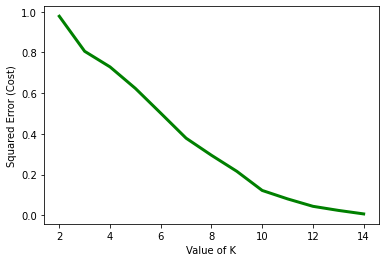

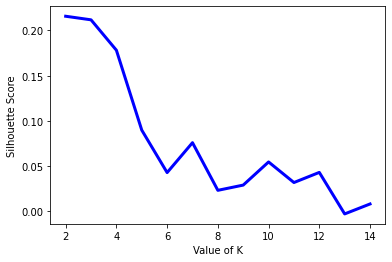

In [21]:
clustering(wesad_all_grouped, 15, f=1.2)

In [22]:
fuzzy_kmeans = skfda.ml.clustering.FuzzyCMeans(n_clusters=4, fuzzifier=1.2, random_state=0)
fd = skfda.FDataGrid(wesad_all_grouped)
fuzzy_kmeans.fit(fd)
clusters = fuzzy_kmeans.membership_degree_ 

In [23]:
#wesad_dataset

In [24]:
unique_participants = wesad_dataset["id"].unique()


In [25]:
fuzzy_clustering = pd.concat([ids, pd.DataFrame(clusters)], axis=1)
fuzzy_clustering

,id,0,1,2,3
0,2,9.999304e-01,6.142299e-06,6.216456e-05,1.261755e-06
1,3,9.999937e-01,5.029600e-07,5.387811e-06,4.250792e-07
2,4,9.999835e-01,1.281121e-06,1.427101e-05,9.065731e-07
3,5,9.313179e-03,1.672124e-03,9.879273e-01,1.087376e-03
4,6,6.450246e-04,1.201115e-04,9.991164e-01,1.184782e-04
5,7,9.618233e-01,1.469396e-02,1.823841e-02,5.244283e-03
6,8,4.971372e-14,1.000000e+00,5.583349e-14,2.768692e-13
7,9,9.884764e-01,1.005003e-03,9.671398e-03,8.472174e-04
8,10,9.997787e-01,1.489474e-05,2.029911e-04,3.378450e-06
9,11,5.488065e-19,5.169938e-18,8.575195e-19,1.000000e+00


In [26]:
sum = 0
for index, participant in fuzzy_clustering.iterrows():
    sum+=participant[2]*len(wesad_dataset.loc[wesad_dataset['id'] == participant['id']])
    
sum

10899.39461905611

In [27]:
wesad_final = pd.DataFrame()

for index, participant in fuzzy_clustering.iterrows():
    for i in range(1, len(participant)):
        temp = wesad_dataset.loc[wesad_dataset['id'] == participant['id']].sample(frac = participant[i-1], replace = False)
        temp["Cluster"] = i-1
        wesad_final = pd.concat([wesad_final, temp], axis=0)


In [28]:
#wesad_dataset

In [29]:
wesad_final

,ACC110,ACC111,ACC1110,ACC1111,ACC1112,ACC1113,ACC1114,ACC1115,ACC1116,ACC1117,...,EDA12,EDA13,TEMP10,TEMP11,TEMP12,TEMP13,id,dataset,stress,Cluster
74106,114.462349,114.462349,126.326243,114.462349,114.462349,114.462349,114.462349,114.462349,126.326243,114.462349,...,-1185.412070,-1185.412070,11204.854337,11204.854337,11204.854337,11204.854337,2,Test,0.0,0
1377,114.462349,126.326243,114.462349,114.462349,126.326243,126.326243,126.326243,114.462349,114.462349,126.326243,...,-1179.706653,-1179.706653,11204.854337,11204.854337,11389.880786,11389.880786,2,Train,0.0,0
9798,-360.093388,-360.093388,-371.957282,-371.957282,-348.229495,-360.093388,-371.957282,-371.957282,-371.957282,-383.821175,...,1234.308088,1222.897255,-8778.002179,-8778.002179,-8778.002179,-8778.002179,2,Train,1.0,0
55755,209.373497,209.373497,209.373497,209.373497,209.373497,209.373497,209.373497,209.373497,209.373497,209.373497,...,-877.239407,-865.828573,-5447.526093,-5447.526093,-5447.526093,-5447.526093,2,Val,0.0,0
32154,150.054030,150.054030,150.054030,150.054030,150.054030,150.054030,150.054030,150.054030,161.917923,150.054030,...,-905.775397,-894.360110,9909.669192,9909.669192,9724.642743,9724.642743,2,Train,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66304,57.652528,74.749297,57.652528,57.652528,57.652528,57.652528,57.652528,57.652528,57.652528,57.652528,...,-772.167003,-801.716924,-9853.855695,-9853.855695,-9853.855695,-9464.090212,17,Test,0.0,3
48416,-181.702239,-181.702239,-232.992546,-250.089315,-267.186085,-232.992546,-250.089315,-267.186085,-250.089315,-215.895777,...,-821.413022,-841.112969,-5176.669896,-5176.669896,-5176.669896,-5176.669896,17,Train,0.0,3
74581,-27.831318,-27.831318,-27.831318,-44.928087,-27.831318,6.362220,57.652528,177.329911,40.555758,-62.024856,...,-284.248815,-294.098789,-6735.731829,-6735.731829,-6735.731829,-6151.083604,17,Test,1.0,3
44080,-147.508701,-147.508701,-147.508701,-147.508701,-147.508701,-130.411932,-164.605470,-130.411932,-181.702239,-130.411932,...,50.623340,40.773367,-15310.572461,-15310.572461,-15310.572461,-14531.041494,17,Train,1.0,3


In [30]:
wesad_final['Cluster'].value_counts()

0    56534
2    10898
1     5801
3     5532
Name: Cluster, dtype: int64

In [82]:
wesad_final.to_csv("Final_CSVs/wesad_fuzzy4_12.csv", index = False)

## ADARP

In [31]:
adarp_dataset = pd.read_csv('Final_CSVs/adarp_id.csv')

In [32]:
adarp_dataset

,id,EDA_0,EDA_1,EDA_2,EDA_3,EDA_4,EDA_5,EDA_6,EDA_7,EDA_8,...,BVP_3831,BVP_3832,BVP_3833,BVP_3834,BVP_3835,BVP_3836,BVP_3837,BVP_3838,BVP_3839,stress
0,8,279.693630,279.693630,277.263096,278.536233,277.263096,275.411261,274.253774,270.434365,275.642741,...,-70.688854,-66.219788,-58.931501,-49.297396,-38.197155,-26.658840,-15.717577,-6.359035,0.593630,0.0
1,1,-26.705520,-8.030028,9.632398,26.103795,19.179108,6.905367,16.839128,32.247524,-1.041654,...,-39.189711,-44.564783,-51.019549,-57.948980,-65.329675,-73.666385,-83.570824,-90.660705,-92.425654,1.0
2,4,424.691455,423.525565,424.108510,423.525565,423.525565,422.651376,422.359904,422.068431,421.485487,...,0.246747,-3.760676,-7.348187,-10.789642,-14.541466,-19.078344,-24.665003,-31.201028,-38.184351,0.0
3,8,-96.859455,-96.743625,-96.743625,-95.932633,-95.932633,-95.469222,-95.353392,-94.889891,-94.889891,...,320.811915,313.534227,308.846124,305.850260,303.458515,300.575702,296.011249,288.440334,276.393287,0.0
4,3,-110.091983,-109.777949,-111.034574,-110.406261,-109.463670,-107.578732,-105.379515,-104.436924,-102.551986,...,-23.899421,-28.421957,-33.007372,-37.737896,-42.661897,-47.750354,-52.916202,-57.980475,-62.672303,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16352,7,-50.075140,-49.147074,-51.374547,-50.817679,-50.260811,-50.632153,-50.817679,-50.260811,-50.260811,...,-0.723575,-0.711710,-0.815529,-1.254537,-2.085093,-3.218208,-4.493704,-5.736572,-6.810362,0.0
16353,6,28.103361,35.282196,47.029379,70.523745,77.547103,49.484387,14.569084,55.847477,21.421672,...,-132.985160,-120.966178,-103.604987,-81.654010,-56.186441,-28.596244,0.348315,26.877198,46.408538,0.0
16354,1,-42.740826,-42.740826,-42.652498,-42.784973,-42.784973,-42.784973,-42.784973,-42.784973,-42.784973,...,-16.913916,-19.377490,-21.413199,-23.027726,-24.297954,-25.327508,-26.169870,-26.891894,-27.516981,0.0
16355,5,-63.990278,-63.568335,-63.779307,-63.990278,-63.779307,-63.779307,-63.779307,-63.357364,-63.990278,...,62.257969,64.576689,65.407528,63.974754,60.731938,57.200871,55.051710,55.785053,59.782407,0.0


In [33]:
adarp_features = adarp_dataset.loc[:, ~adarp_dataset.columns.isin(['dataset', 'stress'])]

In [34]:
adarp_features = pd.DataFrame()
adarp_features['id'] = adarp_dataset['id']

In [35]:
acc_cols = [col for col in adarp_dataset.columns if 'ACC' in col]
bvp_cols = [col for col in adarp_dataset.columns if 'BVP' in col]
eda_cols = [col for col in adarp_dataset.columns if 'EDA' in col]
temp_cols = [col for col in adarp_dataset.columns if 'TEMP' in col]

In [36]:
adarp_features["ACC"] = adarp_dataset[acc_cols].apply(lambda x: statistics.mean(x), axis =1)
adarp_features["BVP"] = adarp_dataset[bvp_cols].apply(lambda x: statistics.mean(x), axis =1)
adarp_features["EDA"] = adarp_dataset[eda_cols].apply(lambda x: statistics.mean(x), axis =1)
adarp_features["TEMP"] = adarp_dataset[temp_cols].apply(lambda x: statistics.mean(x), axis =1)

In [37]:
adarp_features

,id,ACC,BVP,EDA,TEMP
0,8,87.056141,-0.105964,271.004839,-1868.786603
1,1,24.218289,0.205137,9.872665,579.856470
2,4,66.354776,0.171591,396.802050,-2609.949869
3,8,-294.392913,1.178388,-96.544704,325.401261
4,3,138.380651,0.345844,-73.417748,575.258694
...,...,...,...,...,...
16352,7,-132.704329,-0.177470,-51.834810,1708.921628
16353,6,83.817857,-0.158137,26.708240,563.751555
16354,1,369.445380,-0.191824,-43.091480,-2090.371065
16355,5,-156.766685,-0.033326,-64.335650,6672.842012


In [38]:
adarp_mean = adarp_features.groupby('id', as_index = False, group_keys = True).mean()
adarp_mean.columns = map(lambda x: x + '_mean', adarp_mean.columns)
adarp_mean = adarp_mean.rename({'id_mean': 'id'}, axis='columns')
adarp_mean

adarp_min = adarp_features.groupby('id', as_index = False, group_keys = True).min()
adarp_min.columns = map(lambda x: x + '_min', adarp_min.columns)
adarp_min = adarp_min.rename({'id_min': 'id'}, axis='columns')
adarp_min

adarp_std = adarp_features.groupby('id', as_index = False, group_keys = True).std()
adarp_std.columns = map(lambda x: x + '_std', adarp_std.columns)
adarp_std = adarp_std.rename({'id_std': 'id'}, axis='columns')
adarp_std

,id,ACC_std,BVP_std,EDA_std,TEMP_std
0,0,187.167398,0.281347,126.542680,510.635824
1,1,225.810138,0.312767,223.377331,1631.651240
2,2,122.693256,0.332713,129.439464,10.375996
3,3,121.445170,0.365210,452.246350,1275.447248
4,4,167.529967,0.399798,686.649171,5647.574597
5,5,139.732682,0.427314,230.497774,3606.120156
6,6,68.855065,0.259821,360.258644,604.655256
7,7,116.649589,0.187998,1553.186876,1007.111861
8,8,156.909637,0.322209,243.384879,1078.485286
9,9,125.255298,0.340415,149.496755,859.069871


In [39]:
scaler = MinMaxScaler()

adarp_mean.loc[:, adarp_mean.columns!='id'] = scaler.fit_transform(adarp_mean.loc[:, adarp_mean.columns!='id'])
adarp_min.loc[:, adarp_min.columns!='id'] = scaler.fit_transform(adarp_min.loc[:, adarp_min.columns!='id'])
adarp_std.loc[:, adarp_std.columns!='id'] = scaler.fit_transform(adarp_std.loc[:, adarp_std.columns!='id'])

In [40]:
adarp_all_grouped = pd.merge(adarp_min, adarp_mean, on='id')
adarp_all_grouped = pd.merge(adarp_std, adarp_all_grouped, on='id')

In [41]:
adarp_all_grouped

,id,ACC_std,BVP_std,EDA_std,TEMP_std,ACC_min,BVP_min,EDA_min,TEMP_min,ACC_mean,BVP_mean,EDA_mean,TEMP_mean
0,0,0.615693,0.463988,0.000000,0.088743,0.798576,0.799142,0.980562,0.815866,0.893109,0.393920,0.043931,0.176999
1,1,0.816788,0.579368,0.067876,0.287603,0.706703,0.687860,1.000000,0.692886,0.213683,1.000000,0.117380,0.256009
2,2,0.280172,0.652613,0.002030,0.000000,0.897139,0.258779,0.941305,1.000000,1.000000,0.594706,0.096945,0.201203
3,3,0.273677,0.771944,0.228301,0.224415,0.923178,0.143334,0.498146,0.771017,0.887556,0.580532,0.115397,0.042269
4,4,0.513500,0.898957,0.392604,1.000000,0.408612,0.300250,0.000000,0.000000,0.868684,0.440641,0.109819,1.000000
5,5,0.368844,1.000000,0.072867,0.637860,0.588477,0.000000,0.863105,0.437029,0.459965,0.252217,0.227154,0.000000
6,6,0.000000,0.384943,0.163822,0.105421,1.000000,0.967761,0.244747,0.872943,0.593919,0.883874,0.000000,0.099551
7,7,0.248721,0.121198,1.000000,0.176814,0.804849,1.000000,0.679888,0.777135,0.815589,0.327821,1.000000,0.223379
8,8,0.458233,0.614041,0.081900,0.189475,0.000000,0.344981,0.821914,0.664342,0.920866,0.414501,0.026126,0.131184
9,9,0.293505,0.680894,0.016090,0.150552,0.768069,0.214407,0.666620,0.879314,0.587222,0.000000,0.098305,0.180531


In [42]:
ids = adarp_all_grouped["id"]
adarp_all_grouped2 = adarp_all_grouped.drop("id", axis = 1)

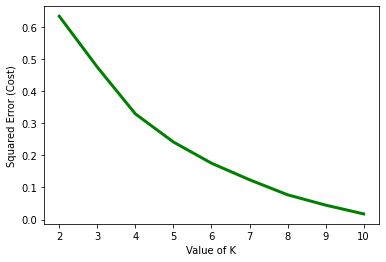

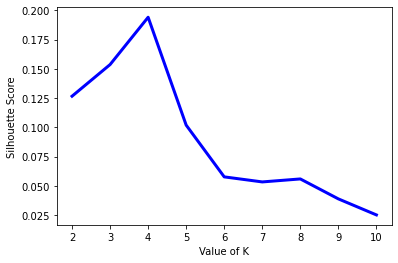

In [43]:
clustering(adarp_all_grouped2, 11, f=1.5)

In [44]:
fuzzy_kmeans = skfda.ml.clustering.FuzzyCMeans(n_clusters=6, fuzzifier=1.7, random_state=0)
fd = skfda.FDataGrid(adarp_all_grouped2)
fuzzy_kmeans.fit(fd)
clusters = fuzzy_kmeans.membership_degree_ 

In [47]:
fuzzy_clustering = pd.concat([ids, round(pd.DataFrame(clusters), 3)], axis=1)
fuzzy_clustering

,id,0,1,2,3,4,5
0,0,0.019,0.079,0.560,0.047,0.121,0.172
1,1,0.001,0.003,0.004,0.003,0.003,0.986
2,2,0.006,0.034,0.890,0.010,0.027,0.033
3,3,0.029,0.153,0.653,0.021,0.081,0.062
4,4,1.000,0.000,0.000,0.000,0.000,0.000
5,5,0.006,0.961,0.014,0.006,0.004,0.009
6,6,0.001,0.002,0.006,0.002,0.983,0.006
7,7,0.087,0.129,0.199,0.143,0.269,0.173
8,8,0.062,0.277,0.339,0.105,0.078,0.139
9,9,0.026,0.311,0.492,0.045,0.060,0.067


Text(60.0, 0.5, 'Participant ID')

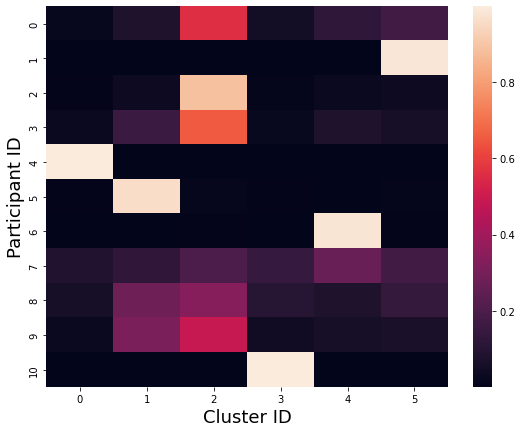

In [28]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(9, 7))
#%matplotlib inline

df = pd.DataFrame(clusters)
#Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
#Cols = ['A', 'B', 'C', 'D']


ax = sns.heatmap(df, annot=False)
#ax.set(xlabel='Cluset ID', ylabel='Participant ID', fontsize = 20)
plt.xlabel("Cluster ID", fontsize = 18)
plt.ylabel("Participant ID", fontsize = 18)

In [26]:
adarp_dataset_new = pd.read_csv("Final_CSVs/adarp_new.csv")

In [27]:
adarp_final = pd.DataFrame()

for index, participant in fuzzy_clustering.iterrows():
    for i in range(1, len(participant)):
        temp = adarp_dataset_new.loc[adarp_dataset_new['id'] == participant['id']].sample(frac = participant[i-1], replace = False)
        temp["Cluster"] = i-1
        adarp_final = pd.concat([adarp_final, temp], axis=0)



In [29]:
adarp_final['Cluster'].value_counts()
len(adarp_final['Cluster'])

27111

In [ ]:
sum = 0
for index, participant in fuzzy_clustering.iterrows():
    sum+=participant[3]*len(adarp_dataset.loc[adarp_dataset['id'] == participant['id']])
    
sum

In [ ]:
adarp_final

In [30]:
adarp_final.to_csv("Final_CSVs/adarp_fuzzy6_17_new.csv", index = False)

In [ ]:
#adarp_dataset_new

In [ ]:
#adarp_dataset_new = pd.merge(adarp_dataset_new, clusters, on = "id")

In [ ]:
#adarp_dataset_new["Cluster"].value_counts()

In [ ]:
#adarp_dataset_new.to_csv("Final_CSVs/adarp_clusters4.csv", index = False)